In [1]:
import json
from collections import Counter
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

In [2]:
import spacy
from spacy.lang.en import English
tokenizer = English().tokenizer

In [3]:
[token.text for token in tokenizer('I am a student.')]

['I', 'am', 'a', 'student', '.']

### Description

In [416]:
with open('data/merged_preds.json', 'r', encoding='utf8') as f:
    preds = json.load(f)

In [170]:
context = [[token.text for token in tokenizer(sample['context'].replace(" __eou__ ", ""))] for sample in preds]
context[0:2]

In [175]:
tokenized = [sample['preds'] for sample in preds]
tokenized = [{algo: [token.text for token in tokenizer(sample[algo])] for algo in sample} for sample in tokenized]

In [194]:
intersect = list()

for ctx, sample in zip(context, tokenized):
    ctx = set(ctx)
    
    sample_dict = {}
    
    for algo in sample:
        algo_len = len(sample[algo]) if len(sample[algo]) else 1
        resp = set(sample[algo])
        sample_dict[algo] = round(len(resp.intersection(ctx)) / algo_len, 3) * 100

    intersect.append(sample_dict)


In [195]:
intersect_df = pd.json_normalize(intersect)
intersect_df.head(3)

,algo_convert,bert_convert_unmasker_11,bert_convert_unmasker_13,bert_convert_unmasker_31,bert_convert_unmasker_33,infilling_11,infilling_13,infilling_31,infilling_33,raw_convert,raw_tfidf,roberta_convert_unmasker_11,roberta_convert_unmasker_13,roberta_convert_unmasker_31,roberta_convert_unmasker_33
0,42.9,28.6,28.6,66.7,66.7,27.3,40.0,40.0,50.0,66.7,66.7,28.6,28.6,66.7,66.7
1,55.6,55.6,55.6,55.6,55.6,53.8,40.0,28.6,43.8,66.7,66.7,55.6,55.6,55.6,55.6
2,42.9,50.0,27.3,33.3,27.3,50.0,25.0,33.3,25.0,50.0,50.0,50.0,27.3,50.0,27.3


In [197]:
intersect_df.mean()

algo_convert                   41.558375
bert_convert_unmasker_11       35.679178
bert_convert_unmasker_13       36.519017
bert_convert_unmasker_31       36.728294
bert_convert_unmasker_33       37.395659
infilling_11                   33.814867
infilling_13                   34.545870
infilling_31                   34.884575
infilling_33                   35.289762
raw_convert                    42.789781
raw_tfidf                      67.574971
roberta_convert_unmasker_11    35.466443
roberta_convert_unmasker_13    36.361852
roberta_convert_unmasker_31    36.583096
roberta_convert_unmasker_33    37.316788
dtype: float64

In [179]:
df_token_len = pd.json_normalize([{algo: len(sample[algo]) for algo in sample} for sample in tokenized])
df_token_len.mean()

algo_convert                   10.005955
bert_convert_unmasker_11       10.106224
bert_convert_unmasker_13       10.198809
bert_convert_unmasker_31       10.371494
bert_convert_unmasker_33       10.358625
infilling_11                   11.144257
infilling_13                   11.217826
infilling_31                   11.351133
infilling_33                   11.372263
raw_convert                     8.962927
raw_tfidf                       6.566270
roberta_convert_unmasker_11    10.134652
roberta_convert_unmasker_13    10.234153
roberta_convert_unmasker_31    10.389358
roberta_convert_unmasker_33    10.383212
dtype: float64

In [141]:
preds = [sample['preds'] for sample in preds]

In [146]:
preds = [{algo: sample[algo].replace("  ", " ") for algo in sample} for sample in preds]

In [147]:
preds[0]

{'algo_convert': 'i generally like to wear hair.',
 'bert_convert_unmasker_11': 'i generally like to wear black.',
 'bert_convert_unmasker_13': 'i generally like to wear black.',
 'bert_convert_unmasker_31': 'how about you do style?',
 'bert_convert_unmasker_33': 'how about you do style?',
 'infilling_11': 'i generally like to wear flats, but dread mondays.',
 'infilling_13': 'i generally like to wear my hair black today.',
 'infilling_31': 'whatever kind of hair i would like i buy.',
 'infilling_33': 'whatever style, i buy.',
 'raw_convert': 'how about you hair style?',
 'raw_tfidf': 'how about you hair style?',
 'roberta_convert_unmasker_11': 'i generally like to wear red.',
 'roberta_convert_unmasker_13': 'i generally like to wear red.',
 'roberta_convert_unmasker_31': 'how about you like style?',
 'roberta_convert_unmasker_33': 'how about you like style?'}

In [148]:
df = pd.json_normalize(preds)

In [149]:
df.nunique().sort_values(ascending=False)

infilling_11                   4887
infilling_31                   4860
infilling_13                   4859
infilling_33                   4798
algo_convert                   4400
roberta_convert_unmasker_11    4345
bert_convert_unmasker_11       4284
roberta_convert_unmasker_13    4281
roberta_convert_unmasker_31    4209
bert_convert_unmasker_13       4180
roberta_convert_unmasker_33    4161
bert_convert_unmasker_31       4120
bert_convert_unmasker_33       4032
raw_convert                    3122
raw_tfidf                      2996
dtype: int64

In [154]:
df.nunique(axis=1).sort_values(ascending=False)

4404    15
4410    15
3003    15
4382    15
5116    15
        ..
825      3
1090     3
1265     3
2723     2
4326     2
Length: 5206, dtype: int64

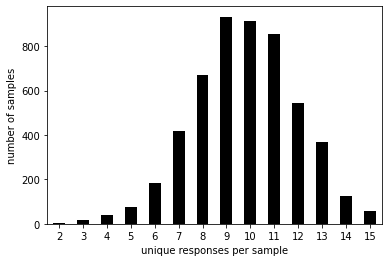

In [245]:
fig = df.nunique(axis=1).sort_values(ascending=True).value_counts().sort_index().plot(
    kind='bar', colormap='gray', rot=0, ylabel="number of samples", xlabel='unique responses per sample').get_figure()

fig.savefig('img/intersecting responses.png')

In [249]:
preds[4326]

{'context': "that is really crazy. but I guess a child maybe should not watch a movie like that __eou__ Very true. let alone act in one. It's no wonder these Horror movies are so successful with high calorie burning and inspiring tales from literature authors like edgar allen poe. bram stoker and mary shelley making it known that horror films have been around for more than a century! __eou__ there are just so many aspects to horror movies. science. supernatural. fantasy. sci fi. it is such an expansive genre",
 'preds': {'algo_convert': 'i enjoy sci-fi.',
  'bert_convert_unmasker_11': 'i enjoy sci-fi.',
  'bert_convert_unmasker_13': 'i enjoy sci-fi.',
  'bert_convert_unmasker_31': 'i enjoy sci-fi.',
  'bert_convert_unmasker_33': 'i enjoy sci-fi.',
  'infilling_11': 'i enjoy sci-fi.',
  'infilling_13': 'i enjoy sci-fi.',
  'infilling_31': 'i enjoy sci-fi.',
  'infilling_33': 'i enjoy sci-fi.',
  'raw_convert': 'i do love horror',
  'raw_tfidf': 'i do love horror',
  'roberta_convert_unm

### DialogRPT Evaluation

In [4]:
import operator

def idx2labels(values, labels) -> dict:
    output =  {labels[i]: value for i, value in enumerate(values)}
    output = pd.DataFrame(output.items(), columns=['algo', 'votes']).sort_values(ascending=False, by='votes')
    return output

def voting(arr: np.ndarray, labels) -> tuple:
    rows = np.array(range(arr.shape[0]), dtype=np.intp)
    sorted_args = np.argsort(arr, axis=-1)

    best = sorted_args[:,-1]
    best = np.array(best, dtype=np.intp)[:, None]
    best = arr[rows[:, np.newaxis], best]
    best = 1 * (arr == best).sum(axis=0)
    best = idx2labels(best, labels)

    worst = sorted_args[:,0]
    worst = np.array(worst, dtype=np.intp)[:, None]
    worst = arr[rows[:, np.newaxis], worst]
    worst = 1 * (arr == worst).sum(axis=0)
    worst = idx2labels(worst, labels)
    
    return best, worst

In [5]:
best_algos = dict()
worst_algos = dict()

In [6]:
with open('data/scored_merged_preds_rpt.json', 'r', encoding='utf8') as f:
    scores = json.load(f)

In [7]:
scores[0]['scores']['updown']

{'algo_convert': 0.318,
 'bert_convert_unmasker_11': 0.299,
 'bert_convert_unmasker_13': 0.299,
 'bert_convert_unmasker_31': 0.254,
 'bert_convert_unmasker_33': 0.254,
 'infilling_11': 0.215,
 'infilling_13': 0.35,
 'infilling_31': 0.316,
 'infilling_33': 0.389,
 'raw_convert': 0.221,
 'raw_tfidf': 0.221,
 'roberta_convert_unmasker_11': 0.269,
 'roberta_convert_unmasker_13': 0.269,
 'roberta_convert_unmasker_31': 0.241,
 'roberta_convert_unmasker_33': 0.241}

In [8]:
scores_2 = list()

for sample in scores:
    new_sample = sample
    new_scores = dict() 
    test_algos = ['raw_convert', 'raw_tfidf', 'bert_convert_unmasker_11']
    # unique = len(set(sample['preds'].values()))
    
    for metric, values in sample['scores'].items():
        new_scores[metric] = {}
        
        new_scores[metric] = {algo: values[algo] for algo in values if algo in test_algos}
        
    new_sample['scores'] = new_scores
    scores_2.append(new_sample)

In [9]:
scores_only = [sample['scores'] for sample in scores_2]

In [10]:
df = pd.json_normalize(scores_only)
df.columns

Index(['updown.bert_convert_unmasker_11', 'updown.raw_convert',
       'updown.raw_tfidf', 'depth.bert_convert_unmasker_11',
       'depth.raw_convert', 'depth.raw_tfidf',
       'width.bert_convert_unmasker_11', 'width.raw_convert',
       'width.raw_tfidf', 'human-vs-rand.bert_convert_unmasker_11',
       'human-vs-rand.raw_convert', 'human-vs-rand.raw_tfidf',
       'human-vs-machine.bert_convert_unmasker_11',
       'human-vs-machine.raw_convert', 'human-vs-machine.raw_tfidf'],
      dtype='object')

In [11]:
algo_names = [name[7:] for name in df.columns[0:3]]
algo_names

['bert_convert_unmasker_11', 'raw_convert', 'raw_tfidf']

In [12]:
df.iloc[:, :3].mean().round(4).sort_values(ascending=False)

updown.raw_tfidf                   0.3720
updown.bert_convert_unmasker_11    0.3687
updown.raw_convert                 0.3639
dtype: float64

In [13]:
best, worst = voting(df.iloc[:, :3].values, algo_names)

In [14]:
best.head(3), worst.head(3)

(                       algo  votes
 2                 raw_tfidf   1980
 0  bert_convert_unmasker_11   1750
 1               raw_convert   1740,
                        algo  votes
 1               raw_convert   1937
 0  bert_convert_unmasker_11   1811
 2                 raw_tfidf   1653)

In [15]:
best_algos['updown'] = best.values
worst_algos['updown'] = worst.values

In [16]:
best_algos

{'updown': array([['raw_tfidf', 1980],
        ['bert_convert_unmasker_11', 1750],
        ['raw_convert', 1740]], dtype=object)}

In [17]:
df.iloc[:, 3:6].mean().round(4).sort_values(ascending=False)

depth.bert_convert_unmasker_11    0.5370
depth.raw_convert                 0.5367
depth.raw_tfidf                   0.5092
dtype: float64

In [18]:
best, worst = voting(df.iloc[:, 3:6].values, algo_names)

In [19]:
best.head(3), worst.head(3)

(                       algo  votes
 1               raw_convert   2069
 0  bert_convert_unmasker_11   1857
 2                 raw_tfidf   1543,
                        algo  votes
 2                 raw_tfidf   2143
 0  bert_convert_unmasker_11   1622
 1               raw_convert   1618)

In [20]:
best_algos['depth'] = best.values
worst_algos['depth'] = worst.values

In [21]:
df.iloc[:, 6:9].mean().round(4).sort_values(ascending=False)

width.bert_convert_unmasker_11    0.6260
width.raw_convert                 0.6184
width.raw_tfidf                   0.5946
dtype: float64

In [22]:
best, worst = voting(df.iloc[:, 6:9].values, algo_names)

In [23]:
best.head(3), worst.head(3)

(                       algo  votes
 1               raw_convert   2027
 0  bert_convert_unmasker_11   1907
 2                 raw_tfidf   1515,
                        algo  votes
 2                 raw_tfidf   2175
 1               raw_convert   1703
 0  bert_convert_unmasker_11   1525)

In [24]:
best_algos['width'] = best.values
worst_algos['width'] = worst.values

In [25]:
df.iloc[:, 9:12].mean().round(4).sort_values(ascending=False)

human-vs-rand.raw_convert                 0.9427
human-vs-rand.bert_convert_unmasker_11    0.8634
human-vs-rand.raw_tfidf                   0.8238
dtype: float64

In [26]:
best, worst = voting(df.iloc[:, 9:12].values, algo_names)

In [27]:
best.head(3), worst.head(3)

(                       algo  votes
 1               raw_convert   3047
 0  bert_convert_unmasker_11   1690
 2                 raw_tfidf   1568,
                        algo  votes
 2                 raw_tfidf   2539
 0  bert_convert_unmasker_11   2170
 1               raw_convert    911)

In [28]:
best_algos['human-vs-rand'] = best.values
worst_algos['human-vs-rand'] = worst.values

In [29]:
df.iloc[:, 12:15].mean().round(4).sort_values(ascending=False)

human-vs-machine.bert_convert_unmasker_11    0.9905
human-vs-machine.raw_convert                 0.9869
human-vs-machine.raw_tfidf                   0.9799
dtype: float64

In [30]:
best, worst = voting(df.iloc[:, 12:75].values, algo_names)

In [31]:
best.head(3), worst.head(3)

(                       algo  votes
 0  bert_convert_unmasker_11   4047
 1               raw_convert   3586
 2                 raw_tfidf   2508,
                        algo  votes
 2                 raw_tfidf   4077
 1               raw_convert   2783
 0  bert_convert_unmasker_11   2435)

In [32]:
best_algos['human-vs-machine'] = best.values
worst_algos['human-vs-machine'] = worst.values

In [33]:
best_algos

{'updown': array([['raw_tfidf', 1980],
        ['bert_convert_unmasker_11', 1750],
        ['raw_convert', 1740]], dtype=object),
 'depth': array([['raw_convert', 2069],
        ['bert_convert_unmasker_11', 1857],
        ['raw_tfidf', 1543]], dtype=object),
 'width': array([['raw_convert', 2027],
        ['bert_convert_unmasker_11', 1907],
        ['raw_tfidf', 1515]], dtype=object),
 'human-vs-rand': array([['raw_convert', 3047],
        ['bert_convert_unmasker_11', 1690],
        ['raw_tfidf', 1568]], dtype=object),
 'human-vs-machine': array([['bert_convert_unmasker_11', 4047],
        ['raw_convert', 3586],
        ['raw_tfidf', 2508]], dtype=object)}

### Evaluator

In [34]:
import operator

def idx2labels(values, labels) -> dict:
    output =  {labels[i]: value for i, value in enumerate(values)}
    output = pd.DataFrame(output.items(), columns=['algo', 'votes']).sort_values(ascending=False, by='votes')
    return output

def voting(arr: np.ndarray, labels) -> tuple:
    rows = np.array(range(arr.shape[0]), dtype=np.intp)
    sorted_args = np.argsort(arr, axis=-1)

    best = sorted_args[:,-1]
    best = np.array(best, dtype=np.intp)[:, None]
    best = arr[rows[:, np.newaxis], best]
    best = 1 * (arr == best).sum(axis=0)
    best = idx2labels(best, labels)

    worst = sorted_args[:,0]
    worst = np.array(worst, dtype=np.intp)[:, None]
    worst = arr[rows[:, np.newaxis], worst]
    worst = 1 * (arr == worst).sum(axis=0)
    worst = idx2labels(worst, labels)
    
    return best, worst

In [35]:
with open('data/scored_merged_preds_dp.json', 'r', encoding='utf8') as f:
    scores = json.load(f)

In [36]:
scores[0]['scores']['algo_convert']

{'isResponseComprehensible': 0.38,
 'isResponseErroneous': 0.696,
 'isResponseInteresting': 0.47,
 'isResponseOnTopic': 0.064,
 'responseEngagesUser': 0.564}

In [37]:
scores_only = [sample['scores'] for sample in scores]

In [38]:
scores = list()

for sample in scores_only:
    sample_new = dict()
    algos=list(sample.keys())
    metrics = list(sample[algos[0]].keys())
    tested_algos = ['raw_convert', 'raw_tfidf', 'bert_convert_unmasker_11']
    
    for metric in metrics:
        sample_new[metric] = {}
        for algo in algos:
            if algo not in test_algos:
                continue
            sample_new[metric][algo] = sample[algo][metric]
            
    scores.append(sample_new)

In [39]:
df = pd.json_normalize(scores)

In [40]:
df.columns

Index(['isResponseComprehensible.bert_convert_unmasker_11',
       'isResponseComprehensible.raw_convert',
       'isResponseComprehensible.raw_tfidf',
       'isResponseErroneous.bert_convert_unmasker_11',
       'isResponseErroneous.raw_convert', 'isResponseErroneous.raw_tfidf',
       'isResponseInteresting.bert_convert_unmasker_11',
       'isResponseInteresting.raw_convert', 'isResponseInteresting.raw_tfidf',
       'isResponseOnTopic.bert_convert_unmasker_11',
       'isResponseOnTopic.raw_convert', 'isResponseOnTopic.raw_tfidf',
       'responseEngagesUser.bert_convert_unmasker_11',
       'responseEngagesUser.raw_convert', 'responseEngagesUser.raw_tfidf'],
      dtype='object')

In [41]:
algo_names = [label[25:] for label in df.columns[0:3]]

In [42]:
algo_names

['bert_convert_unmasker_11', 'raw_convert', 'raw_tfidf']

In [43]:
df.iloc[:, :3].mean().round(4).sort_values(ascending=False)

isResponseComprehensible.bert_convert_unmasker_11    0.3630
isResponseComprehensible.raw_convert                 0.3592
isResponseComprehensible.raw_tfidf                   0.3460
dtype: float64

In [44]:
best, worst = voting(df.iloc[:, :3].values, algo_names)
best.head(3), worst.head(3)

(                       algo  votes
 0  bert_convert_unmasker_11   2340
 1               raw_convert   2014
 2                 raw_tfidf   1576,
                        algo  votes
 2                 raw_tfidf   2434
 1               raw_convert   1826
 0  bert_convert_unmasker_11   1676)

In [45]:
best_algos['isComprehensible'] = best.values
worst_algos['isComprehensible'] = worst.values

In [46]:
df.iloc[:, 3:6].mean().round(4).sort_values(ascending=False)

isResponseErroneous.raw_tfidf                   0.6324
isResponseErroneous.bert_convert_unmasker_11    0.6150
isResponseErroneous.raw_convert                 0.6109
dtype: float64

In [47]:
best, worst = voting(df.iloc[:, 3:6].values, algo_names)
best.head(3), worst.head(3)

(                       algo  votes
 2                 raw_tfidf   2304
 0  bert_convert_unmasker_11   1864
 1               raw_convert   1748,
                        algo  votes
 1               raw_convert   2158
 0  bert_convert_unmasker_11   2141
 2                 raw_tfidf   1617)

In [48]:
best_algos['isErroneous'] = best.values
worst_algos['isErroneous'] = worst.values

In [49]:
df.iloc[:, 6:9].mean().round(4).sort_values(ascending=False)

isResponseInteresting.bert_convert_unmasker_11    0.4632
isResponseInteresting.raw_convert                 0.4594
isResponseInteresting.raw_tfidf                   0.4373
dtype: float64

In [50]:
best, worst = voting(df.iloc[:, 6:9].values, algo_names)
best.head(3), worst.head(3)

(                       algo  votes
 0  bert_convert_unmasker_11   2327
 1               raw_convert   2122
 2                 raw_tfidf   1450,
                        algo  votes
 2                 raw_tfidf   2601
 1               raw_convert   1721
 0  bert_convert_unmasker_11   1630)

In [51]:
best_algos['isInteresting'] = best.values
worst_algos['isInteresting'] = worst.values

In [52]:
df.iloc[:, 9:12].mean().round(4).sort_values(ascending=False)

isResponseOnTopic.bert_convert_unmasker_11    0.1548
isResponseOnTopic.raw_tfidf                   0.1515
isResponseOnTopic.raw_convert                 0.1474
dtype: float64

In [53]:
best, worst = voting(df.iloc[:, 9:12].values, algo_names)
best.head(3), worst.head(3)

(                       algo  votes
 0  bert_convert_unmasker_11   2268
 1               raw_convert   1908
 2                 raw_tfidf   1874,
                        algo  votes
 2                 raw_tfidf   2219
 1               raw_convert   2106
 0  bert_convert_unmasker_11   1794)

In [54]:
best_algos['isOnTopic'] = best.values
worst_algos['isOnTopic'] = worst.values

In [55]:
df.iloc[:, 12:15].mean().round(4).sort_values(ascending=False)

responseEngagesUser.bert_convert_unmasker_11    0.6657
responseEngagesUser.raw_convert                 0.6633
responseEngagesUser.raw_tfidf                   0.6470
dtype: float64

In [56]:
best, worst = voting(df.iloc[:, 12:15].values, algo_names)
best.head(3), worst.head(3)

(                       algo  votes
 1               raw_convert   2113
 0  bert_convert_unmasker_11   2100
 2                 raw_tfidf   1773,
                        algo  votes
 2                 raw_tfidf   2230
 1               raw_convert   1866
 0  bert_convert_unmasker_11   1849)

In [57]:
best_algos['EngagesUser'] = best.values
worst_algos['EngagesUser'] = worst.values

In [58]:
best_algos

{'updown': array([['raw_tfidf', 1980],
        ['bert_convert_unmasker_11', 1750],
        ['raw_convert', 1740]], dtype=object),
 'depth': array([['raw_convert', 2069],
        ['bert_convert_unmasker_11', 1857],
        ['raw_tfidf', 1543]], dtype=object),
 'width': array([['raw_convert', 2027],
        ['bert_convert_unmasker_11', 1907],
        ['raw_tfidf', 1515]], dtype=object),
 'human-vs-rand': array([['raw_convert', 3047],
        ['bert_convert_unmasker_11', 1690],
        ['raw_tfidf', 1568]], dtype=object),
 'human-vs-machine': array([['bert_convert_unmasker_11', 4047],
        ['raw_convert', 3586],
        ['raw_tfidf', 2508]], dtype=object),
 'isComprehensible': array([['bert_convert_unmasker_11', 2340],
        ['raw_convert', 2014],
        ['raw_tfidf', 1576]], dtype=object),
 'isErroneous': array([['raw_tfidf', 2304],
        ['bert_convert_unmasker_11', 1864],
        ['raw_convert', 1748]], dtype=object),
 'isInteresting': array([['bert_convert_unmasker_11', 2327],

In [59]:
sorted_best_algos = dict()

tmp = best_algos

for metric in tmp:    
    sorted_best_algos[metric] = tmp[metric][tmp[metric][:, 0].argsort()]

In [60]:
sorted_best_algos

{'updown': array([['bert_convert_unmasker_11', 1750],
        ['raw_convert', 1740],
        ['raw_tfidf', 1980]], dtype=object),
 'depth': array([['bert_convert_unmasker_11', 1857],
        ['raw_convert', 2069],
        ['raw_tfidf', 1543]], dtype=object),
 'width': array([['bert_convert_unmasker_11', 1907],
        ['raw_convert', 2027],
        ['raw_tfidf', 1515]], dtype=object),
 'human-vs-rand': array([['bert_convert_unmasker_11', 1690],
        ['raw_convert', 3047],
        ['raw_tfidf', 1568]], dtype=object),
 'human-vs-machine': array([['bert_convert_unmasker_11', 4047],
        ['raw_convert', 3586],
        ['raw_tfidf', 2508]], dtype=object),
 'isComprehensible': array([['bert_convert_unmasker_11', 2340],
        ['raw_convert', 2014],
        ['raw_tfidf', 1576]], dtype=object),
 'isErroneous': array([['bert_convert_unmasker_11', 1864],
        ['raw_convert', 1748],
        ['raw_tfidf', 2304]], dtype=object),
 'isInteresting': array([['bert_convert_unmasker_11', 2327],

In [61]:
for metric in best_algos:
    print(best_algos[metric])    
    print(sorted_best_algos[metric])
    print('\n')

[['raw_tfidf' 1980]
 ['bert_convert_unmasker_11' 1750]
 ['raw_convert' 1740]]
[['bert_convert_unmasker_11' 1750]
 ['raw_convert' 1740]
 ['raw_tfidf' 1980]]


[['raw_convert' 2069]
 ['bert_convert_unmasker_11' 1857]
 ['raw_tfidf' 1543]]
[['bert_convert_unmasker_11' 1857]
 ['raw_convert' 2069]
 ['raw_tfidf' 1543]]


[['raw_convert' 2027]
 ['bert_convert_unmasker_11' 1907]
 ['raw_tfidf' 1515]]
[['bert_convert_unmasker_11' 1907]
 ['raw_convert' 2027]
 ['raw_tfidf' 1515]]


[['raw_convert' 3047]
 ['bert_convert_unmasker_11' 1690]
 ['raw_tfidf' 1568]]
[['bert_convert_unmasker_11' 1690]
 ['raw_convert' 3047]
 ['raw_tfidf' 1568]]


[['bert_convert_unmasker_11' 4047]
 ['raw_convert' 3586]
 ['raw_tfidf' 2508]]
[['bert_convert_unmasker_11' 4047]
 ['raw_convert' 3586]
 ['raw_tfidf' 2508]]


[['bert_convert_unmasker_11' 2340]
 ['raw_convert' 2014]
 ['raw_tfidf' 1576]]
[['bert_convert_unmasker_11' 2340]
 ['raw_convert' 2014]
 ['raw_tfidf' 1576]]


[['raw_tfidf' 2304]
 ['bert_convert_unmasker_11' 186

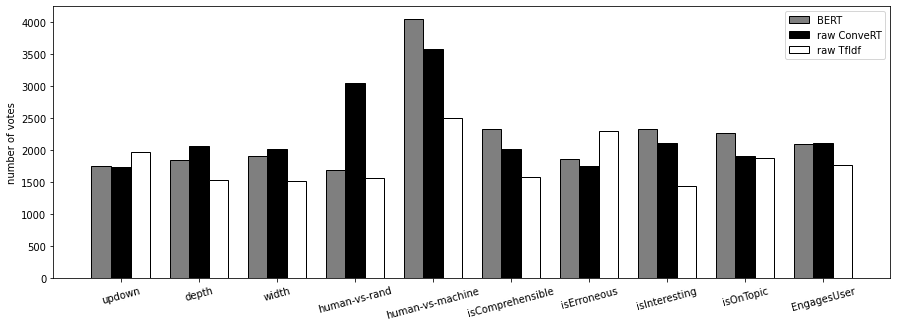

In [76]:
import matplotlib.pyplot as plt

metrics = list(sorted_best_algos.keys())

ind = np.arange(len(metrics)) 
width = 0.25

colors = ['tab:gray', 'k', 'w']

vals = [sorted_best_algos[metric][:,1].squeeze() for metric in metrics]

bert_vals = [val[0] for val in vals]
convert_vals = [val[1] for val in vals]
tfidf_vals = [val[2] for val in vals]

plt.figure(figsize=(15,5))
bar1 = plt.bar(ind, bert_vals, width, color = 'tab:gray', edgecolor = "k")
bar2 = plt.bar(ind+width, convert_vals, width, color='k', edgecolor = "k")
bar3 = plt.bar(ind+width*2, tfidf_vals, width, color = 'w', edgecolor = "k")
  
# plt.xlabel("metrics")
plt.ylabel('number of votes')
# plt.title("Sample-based Evaluation")
  
plt.xticks(ind+width,metrics, rotation=15)
plt.legend( (bar1, bar2, bar3), ('BERT', 'raw ConveRT', 'raw TfIdf') )
plt.set_cmap("Greys")

plt.savefig('img/votes.png')
plt.show()

#### updown

In [110]:
df.iloc[:, 17:29].describe()

,scores.updown.algo_convert,scores.updown.algo_convert_common_tokens,scores.updown.algo_convert_midas_sampler,scores.updown.algo_convert_nd,scores.updown.algo_rpt,scores.updown.bert_convert,scores.updown.bert_convert_unmasker_11,scores.updown.bert_convert_unmasker_13,scores.updown.bert_convert_unmasker_31,scores.updown.bert_convert_unmasker_33,scores.updown.raw_convert,scores.updown.raw_tfidf
count,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000
mean,0.370070,0.383944,0.371053,0.372833,0.367516,0.370011,0.370302,0.368414,0.373224,0.369961,0.369379,0.375060
std,0.096629,0.075323,0.096560,0.098844,0.098334,0.094379,0.094952,0.095180,0.095534,0.095682,0.095676,0.081589
min,0.097000,0.137000,0.097000,0.112000,0.094000,0.097000,0.106000,0.106000,0.108000,0.108000,0.108000,0.125000
25%,0.304000,0.338000,0.303000,0.305250,0.300000,0.305000,0.305000,0.303000,0.306000,0.305000,0.305000,0.322000
50%,0.372000,0.388000,0.373000,0.372000,0.370000,0.372000,0.373000,0.372000,0.377000,0.373000,0.372000,0.378000
75%,0.434000,0.432000,0.438000,0.441750,0.433000,0.433750,0.434000,0.433000,0.438000,0.437000,0.435000,0.429000
max,0.698000,0.626000,0.730000,0.764000,0.741000,0.678000,0.725000,0.724000,0.733000,0.731000,0.733000,0.722000


##### algo_convert

In [57]:
df[['context', 'preds.algo_convert', 'scores.updown.algo_convert']][df['scores.updown.algo_convert'] > 0.6].head().iloc[:, [0,1]]

,context,preds.algo_convert
77,I never saw that. but I heard it was surreal. [SEP] Jon Hamm taught drama at his old high school. I believe one of his students was a man named Ellie Kemper who played in the office. [SEP] I guess Jon has the magic touch! He trains his students well. Michael Caine joined his high school drama club for the women. I understand that motivation. too.,he even came back with michael caine-she was directing him
122,That makes it even more impressive that there are over 300 breeds of horses in the world today. [SEP] Yes. humans began domesticating horses around 4000 BC. and their domestication is believed to have been widespread by 3000 BC. Some species were domesticated but then some are still living in the wild as feral horses. [SEP] I just heard that Icelandic horses have a fifth gear. Horses are simply fascinating.,they are the first horses to be domesticated
149,It's amazing that he did so much after not only getting a college degree. but also taking a break from his studies to serve in the military. [SEP] Yea pretty amazing for a guy that started out picking cotton and shinning shoes. [SEP] Maybe the way he worked so hard to rise in life was the inspiration for him trying to help others do the same.,he also seems modest because he doesn t like to say that he was a inspiration
214,Unicef will donate a day of clean water to a child in need for every minute you do not use your cell phone. I wonder how many people would do this to make an impact [SEP] I didn't know that was a thing. I wonder if they base it on your normal usage? I know I'm not on my phone THAT much. They'd be donating plenty of water for me. [SEP] I feel like I can do better when it comes to that.,i am going to go water my phone now
356,Are you a Linkin Park fan? They are great. They played 324 concerts in 2001. I still cant believe it. [SEP] I am I think they are one of the best bands ever. too bad the leading singer committed suicide. maybe the toll of many concerts made him fall into depression. [SEP] so sad that most of the singer end up committing suicide. on the other hand I heard that Pink Floyd recorded a live concer in Rome with no audience.,pink floyd must have been better at performing live


In [56]:
df[['context', 'preds.algo_convert', 'scores.updown.algo_convert']][df['scores.updown.algo_convert'] < 0.15].head().iloc[:, [0,1]]

,context,preds.algo_convert
289,Hello! Do you like watching dramas? [SEP] I do watch some here and there. [SEP] Did you ever watch House?,i watch some but not that much
392,do you watch tv? [SEP] I do quite a bit. Do you watch the SNL? [SEP] Sometimes. do you have a favorite skit. Did you ever watch the SImpsons?,i watch some but not that much
405,It is the Two Noble KInsmes. Yes all the time [SEP] Do you know why the NY area code is 212? [SEP] I have no idea. why is that?,it was discovered by kinsmes in 2013 but i don t know what they call it exactly
469,Good for him. Does he have a specific charity he raises for? [SEP] not that I am aware of. but it's really great of him to do. [SEP] That is awesome. I like Lebron. Did you know the New Zealand basketball team is nicknamed the tall blacks?,no i didn t i only heard he played basketball
591,Two of my favorites as well. both great shows. they probably won the award another year. do you like Bill Murray? [SEP] Yeah he is great! I wonder if I should take his recommendation to watch King Fu Hustle?! [SEP] I did watch the movie and think its pretty good so yeah. following his advice is a good idea if you want to have a few laughs,ya he s a cool year i like him


##### convert_nd

In [61]:
df[['context', 'preds.algo_convert_nd', 'scores.updown.algo_convert']][df['scores.updown.algo_convert_nd'] > 0.7].head().iloc[:, [0,1]]

,context,preds.algo_convert_nd
4372,The government are trying to conserve it though. Speaking of the government. did you know 86% of Nebraska is owned by US government. [SEP] Interesting! And Norwegian government cares about land other than its own. they donated one billion to help save the Amazon rainforest. [SEP] That's better than the US Government. They passed a law in 2006 where government employees couldn't be prosecuted for violating the geneva conventions,did you know that in 39 amazon rainforest in the us
5089,"That ’ s a little complicated. You ’ ll get to know it when you are acquainted with the U.S. history later on. Religion was and is a part of American people ’ s life. Guess what? Even Harvard University, which is a highly academic institution, is in a sense the product of religion. [SEP] Really? [SEP] Absolutely! It was founded by a group of Puritan immigrants from England.",did you know that in 39 england in the us


In [71]:
df[['context', 'preds.algo_convert_nd', 'scores.updown.algo_convert']][df['scores.updown.algo_convert_nd'] < 0.15].head().iloc[:, [0,1]]

,context,preds.algo_convert_nd
289,Hello! Do you like watching dramas? [SEP] I do watch some here and there. [SEP] Did you ever watch House?,no i don t really watch it
405,It is the Two Noble KInsmes. Yes all the time [SEP] Do you know why the NY area code is 212? [SEP] I have no idea. why is that?,it was discovered by kinsmes in 2013 but i don t know what they call it exactly
449,"Why? [SEP] Well, it ’ s very comfortable just to drift here. [SEP] Have you thought about graduate school?",no i dint know that the only school really
713,Yeah and it only had 54 colors but it was so cool at that time [SEP] I know. I remember playing this racing game where you just stomp on a mat to win and I thought it was amazing. [SEP] That sounds cool. Do you watch much tv?,no i don t have mat
772,Same here. I never liked any of his movies I did see like mission impossible. [SEP] did you see the newest one? Fallout? [SEP] I have not. Do you like the simpsons?,no i haven t seen it


##### rpt

In [60]:
df[['context', 'preds.algo_rpt', 'scores.updown.algo_rpt']][df['scores.updown.algo_rpt'] > 0.7].head().iloc[:, [0,1]]

,context,preds.algo_rpt
3355,A few. Hernandez played with gary carter. another Hall of Famer. [SEP] He is at his best when explaining the years-long refinement of his style at the plate [SEP] Did you know it can be hard to tell managers and players apart because they both wear uniforms unlike in any other sport,he is a uniforms-in for the hall of fame
3759,Me too! Even astronauts have connection in the intl space station! [SEP] Very cool. Makes sense because it is so addicting with measurable changes in the brain! Well it was lovely chatting with you! [SEP] Yes I have enjoyed very much!!,it was a modest intl space station


In [59]:
df[['context', 'preds.algo_rpt', 'scores.updown.algo_rpt']][df['scores.updown.algo_rpt'] < 0.15].head().iloc[:, [0,1]]

,context,preds.algo_rpt
469,Good for him. Does he have a specific charity he raises for? [SEP] not that I am aware of. but it's really great of him to do. [SEP] That is awesome. I like Lebron. Did you know the New Zealand basketball team is nicknamed the tall blacks?,no i didn t i only heard he played basketball
591,Two of my favorites as well. both great shows. they probably won the award another year. do you like Bill Murray? [SEP] Yeah he is great! I wonder if I should take his recommendation to watch King Fu Hustle?! [SEP] I did watch the movie and think its pretty good so yeah. following his advice is a good idea if you want to have a few laughs,ya he s a cool year i like him
688,Did you ever watch South Park's Family Guy episode? [SEP] Yes. I watch the south park zone cartoon wars parts. It's very good program. [SEP] What are your favorite television shows?,i don t really have a favorite but i can discuss several that i find interesting
689,Yes. I watch the south park zone cartoon wars parts. It's very good program. [SEP] What are your favorite television shows? [SEP] I love all kind of comedy shows. what about you?,i don t really have a favorite but i can discuss several that i find interesting
697,No. i don't know that program. And i love baseball. What about you? [SEP] I love it. It's so popular in Japan that they had no idea it was America's pasttime. [SEP] Okay. You like comedy movies?,ya not as much with baseball though i don t think its that popular here


#### depth

In [107]:
df.iloc[:,17:].describe()

,scores.updown.algo_convert,scores.updown.algo_convert_common_tokens,scores.updown.algo_convert_midas_sampler,scores.updown.algo_convert_nd,scores.updown.algo_rpt,scores.updown.bert_convert,scores.updown.bert_convert_unmasker_11,scores.updown.bert_convert_unmasker_13,scores.updown.bert_convert_unmasker_31,scores.updown.bert_convert_unmasker_33,...,scores.width.bert_convert_unmasker_11,scores.width.bert_convert_unmasker_13,scores.width.bert_convert_unmasker_31,scores.width.bert_convert_unmasker_33,scores.width.raw_convert,scores.width.raw_tfidf,scores.width.roberta_convert_unmasker_11,scores.width.roberta_convert_unmasker_31,scores.width.roberta_convert_unmasker_31_with_stoken,scores.width.roberta_convert_unmasker_33_with_stoken
count,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,...,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000
mean,0.370070,0.383944,0.371053,0.372833,0.367516,0.370011,0.370302,0.368414,0.373224,0.369961,...,0.631798,0.629556,0.640328,0.637462,0.628121,0.609761,0.635828,0.643742,0.643729,0.641115
std,0.096629,0.075323,0.096560,0.098844,0.098334,0.094379,0.094952,0.095180,0.095534,0.095682,...,0.136601,0.139693,0.140439,0.142651,0.154277,0.142166,0.135999,0.139375,0.139772,0.141815
min,0.097000,0.137000,0.097000,0.112000,0.094000,0.097000,0.106000,0.106000,0.108000,0.108000,...,0.082000,0.132000,0.125000,0.097000,0.070000,0.081000,0.141000,0.158000,0.108000,0.128000
25%,0.304000,0.338000,0.303000,0.305250,0.300000,0.305000,0.305000,0.303000,0.306000,0.305000,...,0.546000,0.539000,0.550000,0.546000,0.531000,0.522000,0.549000,0.553000,0.554000,0.551000
50%,0.372000,0.388000,0.373000,0.372000,0.370000,0.372000,0.373000,0.372000,0.377000,0.373000,...,0.647000,0.645000,0.656000,0.655000,0.647000,0.620000,0.650000,0.660000,0.661000,0.659000
75%,0.434000,0.432000,0.438000,0.441750,0.433000,0.433750,0.434000,0.433000,0.438000,0.437000,...,0.732000,0.734000,0.745000,0.743000,0.745000,0.712000,0.736000,0.749000,0.749000,0.747000
max,0.698000,0.626000,0.730000,0.764000,0.741000,0.678000,0.725000,0.724000,0.733000,0.731000,...,0.914000,0.920000,0.922000,0.922000,0.926000,0.935000,0.930000,0.931000,0.931000,0.919000


##### algo_convert

In [63]:
df[['context', 'preds.algo_convert', 'scores.depth.algo_convert']][df['scores.depth.algo_convert'] > 0.8].head().iloc[:, [0,1]]

,context,preds.algo_convert
127,Yes. fascinating fact!. And sharks can be trained like dogs to bark. [SEP] I kinda feel bad for them. They have no rib cages so if they ever end up on land. they get crushed by the weight of their body. [SEP] Yes. sad indeed. Sharks even evolved earlier than dinosaurs and trees.,and with only 29 being land-- it s kind of crazy to know that humans live on such a small part of the land s surface
281,I know! That sounds so cool. I wonder how they do that? I know you can hear Jupiter's storms too. [SEP] Yes. its so cool! Did you know the equator rotates faster than the poles? [SEP] I guess that makes sense if you think about it. but is sounds somewhat shocking.,and with only 29 being land-- it s kind of crazy to know that humans live on such a small part of the poles s surface
542,I'm not sure. Did you know that until 1805. the runner up in a presidential election automatically became the VP? Can you imagine Hillary being in office with Trump now? [SEP] No I cannot imagine that at all actually. did you know the guest house is larger than the white house? [SEP] That has to be pretty big. because the White House is huge!,yeah but i do wonder if they presidents live in those house or not
645,I don't watch it too much. but I had a lot of fun playing it as a kid. Have you heard of Lionel Messi? [SEP] Of course. He's one of the best footballers of all time. He has 660 career goals for Argentina! [SEP] I heard he had a type of growth hormone deficiency as a kid and that is why they went to Spain for football.,i heard spain believes that too
896,"Wow! I bet there's one for chess. too. Have you ever heard of the fantasy book called ""In the Realms of the Unread?"" [SEP] Is that the manuscript with over 15.000 pages and watercolor illustrations? That would take a long time to read [SEP] Yes. but it sounds amazing! They could make a game or movie out of it. Too bad it was discovered after the writer died.",i wonder how much you could realistically retain when you read at that game


In [65]:
df[['context', 'preds.algo_convert', 'scores.depth.algo_convert']][df['scores.depth.algo_convert'] < 0.15].head().iloc[:, [0,1]]

,context,preds.algo_convert
1892,"Here they are. [SEP] Thanks a lot ; are these all the notes? [SEP] Oh, no, this is the rest.",i also need to check these notes out
1893,"Thanks a lot ; are these all the notes? [SEP] Oh, no, this is the rest. [SEP] Thank you very much.",i also need to check these notes out
2091,I'm going to try to leave by ten. [SEP] Take care and give my best to your parents. [SEP] Good-bye. Hope to see you soon again next year.,you too bye


##### convert_nd

In [72]:
df[['context', 'preds.algo_convert_nd', 'scores.depth.algo_convert']][df['scores.depth.algo_convert_nd'] > 0.8].head().iloc[:, [0,1]]

,context,preds.algo_convert_nd
47,sounds like you know a thing or 2 about radio waves. WW2 soldiers made radios out of razor blades and a pencil [SEP] Ah yes. foxhole radios. Well electromagnetic energy is everywhere. it can travel through space so why couldn't it carry information? [SEP] it does so and very well. digital signals are made by shifitng phase and amplitude. pretty cool stuff. each shift translateds into a 1 or 0 in the bits of the information fields.,have you ever used a rotary amplitude
63,"I know. only one lefty? That is strange. Did you know that the Net Passer Rating is considered the ""Mother of All Stats"". It is the go to thing in measuring a QB and the caliber of Super Bowl teams! [SEP] Cool. Do yo like the new england patriots? [SEP] I don't mind them. my favorite team is the Jacksonville Jaguars though. Who is your favorite team?",do you follow the jacksonville jaguars at all
83,I don't play video games. but I can expect that film and games will merge and blend more. People like interactivity. but they want to be entertained as well. [SEP] we come a long way the Nintendo system could only display 54 colors. [SEP] 54 colors is so few. but the game designs were solid. That's what made games on the NES fun. I think the newer systems are more powerful. but not necessary more fun.,did you know that it could only display 54 systems
127,Yes. fascinating fact!. And sharks can be trained like dogs to bark. [SEP] I kinda feel bad for them. They have no rib cages so if they ever end up on land. they get crushed by the weight of their body. [SEP] Yes. sad indeed. Sharks even evolved earlier than dinosaurs and trees.,and with only 29 being land-- it s kind of crazy to know that humans live on such a small part of the land s surface
130,Have you ever seen the white shark cafe? It's where white sharks meet in the middle of the Pacific Ocean. [SEP] No. I've never seen it but I have heard about it. Did you know that not just dolphins rescue sailors. but sharks too? [SEP] I did know that. Animals cease to amaze me. We have to protect them at all costs.,and with only 29 being land-- it s kind of crazy to know that humans live on such a small part of the pacific ocean s surface


In [73]:
df[['context', 'preds.algo_convert_nd', 'scores.depth.algo_convert']][df['scores.depth.algo_convert_nd'] < 0.15].head().iloc[:, [0,1]]

,context,preds.algo_convert_nd
1349,"Hello! [SEP] Hello, Debbie. This is Donald. [SEP] Oh, hi, Donald.",i do enjoy political donald
1892,"Here they are. [SEP] Thanks a lot ; are these all the notes? [SEP] Oh, no, this is the rest.",i also need to check these notes out
1893,"Thanks a lot ; are these all the notes? [SEP] Oh, no, this is the rest. [SEP] Thank you very much.",i also need to check these notes out
2091,I'm going to try to leave by ten. [SEP] Take care and give my best to your parents. [SEP] Good-bye. Hope to see you soon again next year.,you too bye
2208,This is your table. [SEP] And would you like to order now? [SEP] Yes.,very well then


##### rpt

In [74]:
df[['context', 'preds.algo_rpt', 'scores.depth.algo_rpt']][df['scores.depth.algo_rpt'] > 0.7].head().iloc[:, [0,1]]

,context,preds.algo_rpt
37,yes. that's why Fox News is so popular if you ask me. I like Bill Clinton. but Hillary is another story. Wasn't Richard Nixon a democrat? Fox News was created by him and Richard Ailes.. [SEP] No Nixon was a Republican. he ran against Kennedy. a democrat. who was one of the top three wealthiest presidents in American history. [SEP] Right... i should have known that. The White House's guest house is bigger than the WH itself. funny...,he isnt even one of the wealthiest presidents
38,No Nixon was a Republican. he ran against Kennedy. a democrat. who was one of the top three wealthiest presidents in American history. [SEP] Right... i should have known that. The White House's guest house is bigger than the WH itself. funny... [SEP] In 1805 they changed it but Hillary Clinton would be Donald Trump;s vice president because the runnerup became the Vice President haha.,haha isn t particularly rich compared to them
46,Well it makes sense since their frequency and amplitude could affect the oscillating fields even though they are million of miles away. [SEP] sounds like you know a thing or 2 about radio waves. WW2 soldiers made radios out of razor blades and a pencil [SEP] Ah yes. foxhole radios. Well electromagnetic energy is everywhere. it can travel through space so why couldn't it carry information?,because it is the fastest to dial on a rotary radios
48,Ah yes. foxhole radios. Well electromagnetic energy is everywhere. it can travel through space so why couldn't it carry information? [SEP] it does so and very well. digital signals are made by shifitng phase and amplitude. pretty cool stuff. each shift translateds into a 1 or 0 in the bits of the information fields. [SEP] Yes all binary. just like computers. Luckily there are websites that have archived thousands of radio dramas and share them for free.,that seems really convenient but also kind of random now that we have digital dramas
54,That would be interesting to know. We are getting close to the super bowl which is held usually the first sunday in february [SEP] Yes. I agree. It says Foles was the first Quarterback in NFL history with completions of more than 40 yards in three different receivers in a postseason game. [SEP] Cool. did you know that an NFL has only 11 minutes of gameplay in average?,yes he is the only left handed qb in the nfl right now


In [75]:
df[['context', 'preds.algo_rpt', 'scores.depth.algo_rpt']][df['scores.depth.algo_rpt'] < 0.15].head().iloc[:, [0,1]]

,context,preds.algo_rpt
302,Not to much. [SEP] I was going to say that if you did. there's a website that has thousands of episodes for free. [SEP] That would be neat to look at.,thats interesting i will have to look that up on the website


#### width

In [108]:
df.iloc[:, 17:].describe()

,scores.updown.algo_convert,scores.updown.algo_convert_common_tokens,scores.updown.algo_convert_midas_sampler,scores.updown.algo_convert_nd,scores.updown.algo_rpt,scores.updown.bert_convert,scores.updown.bert_convert_unmasker_11,scores.updown.bert_convert_unmasker_13,scores.updown.bert_convert_unmasker_31,scores.updown.bert_convert_unmasker_33,...,scores.width.bert_convert_unmasker_11,scores.width.bert_convert_unmasker_13,scores.width.bert_convert_unmasker_31,scores.width.bert_convert_unmasker_33,scores.width.raw_convert,scores.width.raw_tfidf,scores.width.roberta_convert_unmasker_11,scores.width.roberta_convert_unmasker_31,scores.width.roberta_convert_unmasker_31_with_stoken,scores.width.roberta_convert_unmasker_33_with_stoken
count,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,...,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000
mean,0.370070,0.383944,0.371053,0.372833,0.367516,0.370011,0.370302,0.368414,0.373224,0.369961,...,0.631798,0.629556,0.640328,0.637462,0.628121,0.609761,0.635828,0.643742,0.643729,0.641115
std,0.096629,0.075323,0.096560,0.098844,0.098334,0.094379,0.094952,0.095180,0.095534,0.095682,...,0.136601,0.139693,0.140439,0.142651,0.154277,0.142166,0.135999,0.139375,0.139772,0.141815
min,0.097000,0.137000,0.097000,0.112000,0.094000,0.097000,0.106000,0.106000,0.108000,0.108000,...,0.082000,0.132000,0.125000,0.097000,0.070000,0.081000,0.141000,0.158000,0.108000,0.128000
25%,0.304000,0.338000,0.303000,0.305250,0.300000,0.305000,0.305000,0.303000,0.306000,0.305000,...,0.546000,0.539000,0.550000,0.546000,0.531000,0.522000,0.549000,0.553000,0.554000,0.551000
50%,0.372000,0.388000,0.373000,0.372000,0.370000,0.372000,0.373000,0.372000,0.377000,0.373000,...,0.647000,0.645000,0.656000,0.655000,0.647000,0.620000,0.650000,0.660000,0.661000,0.659000
75%,0.434000,0.432000,0.438000,0.441750,0.433000,0.433750,0.434000,0.433000,0.438000,0.437000,...,0.732000,0.734000,0.745000,0.743000,0.745000,0.712000,0.736000,0.749000,0.749000,0.747000
max,0.698000,0.626000,0.730000,0.764000,0.741000,0.678000,0.725000,0.724000,0.733000,0.731000,...,0.914000,0.920000,0.922000,0.922000,0.926000,0.935000,0.930000,0.931000,0.931000,0.919000


##### algo_convert

In [77]:
df[['context', 'preds.algo_convert', 'scores.width.algo_convert']][df['scores.width.algo_convert'] > 0.9].head().iloc[:, [0,1]]

,context,preds.algo_convert
54,That would be interesting to know. We are getting close to the super bowl which is held usually the first sunday in february [SEP] Yes. I agree. It says Foles was the first Quarterback in NFL history with completions of more than 40 yards in three different receivers in a postseason game. [SEP] Cool. did you know that an NFL has only 11 minutes of gameplay in average?,there has to be more than one left handed qb in the nfl
2283,I think they don't have bandwidth in their area. Can't stream. Blockbusters really blew it by not buying Netflix. [SEP] Yep they sure did. originally they could have bought them for only $59 and imagine that now Netflix is worth two billion LOL [SEP] $50 million is a steal in Internet terms. Now they are huge. One day. though. some company might do the same thing to Netflix.,now the netflix is worth over 100 billion and just going up further
2414,I heard about that before. but I don't get it... wouldn't 111 be the fastest way ? [SEP] Yeah. you'd think. Nowadays no one uses those phones any more and an iphone has more computing power than our entire Nuclear arsenal. [SEP] That sounds really unreasonable... should someone look into that ? ;) Sounds disturbing...,the nuclear arsenal is controlled by power
2633,I guess I was not as adventurous. the thought of putting liquid nitrogen in my mouth does not appeal to me. Negative 320F is what I hear. [SEP] You could hurt yourself! Why would you do that? Does it get you high or something? Crazy. [SEP] Just a trend I suppose. I understand they are sold at kiosks in malls. made by pouring the nitrogen over cheese puffs or similar. There are warnings. but of course kids ignore it and do it the wrong way,so you cannot warm up your 320f
2722,"No, there aren ’ t. this map just show the geographical features. Look at the Himalayan plateau with the highest peaks in the world. [SEP] The thing that I find most surprising is that most of the world is covered with water. Compared to the oceans, most countries are tiny. [SEP] I find it incredible how millions of years of volcanic activity have created mountains thousands of metres tall.",but mt everest is at 29 000 feet


In [78]:
df[['context', 'preds.algo_convert', 'scores.width.algo_convert']][df['scores.width.algo_convert'] < 0.15].head().iloc[:, [0,1]]

,context,preds.algo_convert
91,LOL! Well. I enjoyed chatting with you! [SEP] You as well. [SEP] Bye!,you too bye
142,Do you wash windows? [SEP] Of course. We wash the windows inside and out. [SEP] What about the interior?,all cleaned up
1141,"Hello, Helen. [SEP] Hi, Steven. [SEP] How are you today?",fine thank you
1892,"Here they are. [SEP] Thanks a lot ; are these all the notes? [SEP] Oh, no, this is the rest.",i also need to check these notes out
1961,"OK.Do you want us to bring something? [SEP] No, just come here. [SEP] OK, see you later.",ok see you later


##### convert_nd

In [81]:
df[['context', 'preds.algo_convert_nd', 'scores.width.algo_convert_nd']][df['scores.width.algo_convert_nd'] > 0.9].head().iloc[:, [0,1]]

,context,preds.algo_convert_nd
172,"Fine, start the car. now gently step on the clutch and shift to 1st gear. Good, now accelerate gently and let go of the clutch as you do it. There we go, good! [SEP] I ’ m doing it! I ’ m driving! This is awesome! Let ’ s turn some music on! [SEP] Keep your eyes on the road! No music! We are coming up to a red light, step on the brakes. What are you doing? I said the brakes! Look out for those people! Get off the sidewalk!",does it have automatic clutch
496,have you driven a tesla? i would love to drive one some day. [SEP] No. I have seen charging stations though. I think it would be really cool. It is also neat that musk took a $78 million dollar pay but giving everything back to the company except $1 [SEP] He needs to make $1 to be an employee technically. i think the company is his baby. plus he has money from other sources.,did you know company is owned by amazon
587,It was a different time. I heard the event happened at the Microsoft Theater. that must be a really cool venue. [SEP] Yeah I would love to visit there. It's in LA right? I like the show because its a comedy and drama. I like comedies. I also enjoyed the show 3rd rock from the sun. [SEP] It was pretty good I heard it beat important shows,are there any comedies that you would like to see live
602,did you know that unfortunately eighty percent of earth's naturally occuring forests have been eliminated? [SEP] I expect that the next decade or so will show some dramatic changes in the environment. The earth formed over 4.5 billion years ago. but we are changing it quickly ourselves. [SEP] yes we are. and somehow Earth was made and when that happened a day was only 5.5 hours long. that's a fast day!,and with only 29 being land-- it s kind of crazy to know that humans live on such a small part of the earth s surface
915,Wow. that would get me so many places! I wonder how safe it is. I like traveling by car. you? [SEP] I like traveling by plane but road trips by car can be nice too. In Japan it would not be so nice though since all their highways are tolls. To get across the country you will pay $300. [SEP] That is so expensive! I get mad paying 20 dollars to go to chicago and back lol. Ever been to mackinac island in Michigan. they banned motorized vehicles,did you know that cost more than 300 to travel across michigan


In [83]:
df[['context', 'preds.algo_convert_nd', 'scores.width.algo_convert_nd']][df['scores.width.algo_convert_nd'] < 0.15].head().iloc[:, [0,1]]

,context,preds.algo_convert_nd
6,"Yes, Miss. Is that all right? [SEP] Beautifully done. [SEP] And would you like a manicure?",yes madam
91,LOL! Well. I enjoyed chatting with you! [SEP] You as well. [SEP] Bye!,you too bye
839,Hello [SEP] Hi [SEP] Do you like cats.,yes i do like them
1141,"Hello, Helen. [SEP] Hi, Steven. [SEP] How are you today?",fine thank you
1892,"Here they are. [SEP] Thanks a lot ; are these all the notes? [SEP] Oh, no, this is the rest.",i also need to check these notes out


##### rpt

In [84]:
df[['context', 'preds.algo_rpt', 'scores.width.algo_rpt']][df['scores.width.algo_rpt'] > 0.9].head().iloc[:, [0,1]]

,context,preds.algo_rpt
496,have you driven a tesla? i would love to drive one some day. [SEP] No. I have seen charging stations though. I think it would be really cool. It is also neat that musk took a $78 million dollar pay but giving everything back to the company except $1 [SEP] He needs to make $1 to be an employee technically. i think the company is his baby. plus he has money from other sources.,i just can not believe that company paid 1 65 billion for it
542,I'm not sure. Did you know that until 1805. the runner up in a presidential election automatically became the VP? Can you imagine Hillary being in office with Trump now? [SEP] No I cannot imagine that at all actually. did you know the guest house is larger than the white house? [SEP] That has to be pretty big. because the White House is huge!,why just think it s interesting that house was first constructed back in 1801
748,When Earth was formed. days were only 5.5 hours long. I can't even get much done in 24 hours. Haha. [SEP] The earth was spinning really fast. Did you know the cables carrying phone and internet data across oceans is on 2.7 inches in diameter? [SEP] That is cool how much things have progressed. An iPhone has more computing power than the whole us nuclear icbm deterrent.,the nuclear arsenal is controlled by power
2414,I heard about that before. but I don't get it... wouldn't 111 be the fastest way ? [SEP] Yeah. you'd think. Nowadays no one uses those phones any more and an iphone has more computing power than our entire Nuclear arsenal. [SEP] That sounds really unreasonable... should someone look into that ? ;) Sounds disturbing...,the nuclear arsenal is controlled by power
2721,"There are no countries marked on the map. [SEP] No, there aren ’ t. this map just show the geographical features. Look at the Himalayan plateau with the highest peaks in the world. [SEP] The thing that I find most surprising is that most of the world is covered with water. Compared to the oceans, most countries are tiny.",and with only 29 being land-- it s kind of crazy to know that humans live on such a small part of the countries s surface


In [86]:
df[['context', 'preds.algo_rpt', 'scores.width.algo_rpt']][df['scores.width.algo_rpt'] < 0.15].head().iloc[:, [0,1]]

,context,preds.algo_rpt
91,LOL! Well. I enjoyed chatting with you! [SEP] You as well. [SEP] Bye!,thank you bye-bye
99,What ’ s wrong? [SEP] I got laid off today. [SEP] Oh no! That ’ s terrible!,oh sorry to hear that - do
100,I got laid off today. [SEP] Oh no! That ’ s terrible! [SEP] Yeah.,oh sorry to hear that - do
233,I like how Kenny dies that never gets old lol great times. funny show [SEP] yes. they make fun of the tv tropes constantly. a lot of fun. Anyway. great chat! [SEP] They also make fun of each other. of other shows so yeah a lot of fun. nice chat,yep great chat have a good one
573,I bet they have their contracts covered. Are you a Homer Simpson fan? [SEP] I am! I heard he had like 188 jobs in the first 400 episodes! [SEP] lol. I know its funny!! The show was the best!! Good chat!!,yep great chat have a good one


In [97]:
df[['context', 'preds.algo_rpt', 'scores.human-vs-machine.algo_rpt']][df['scores.human-vs-machine.algo_rpt'] < 0.2].head().iloc[:, [0,1]]

,context,preds.algo_rpt
2656,"No, it's not far. [SEP] How far is it? [SEP] About a mile and a half.",about an far inland
